# Digit Recognizer MLP vs CNN

Two deep learning models, a multi-layer perceptron (MLP) and a convolutional 
neural network (CNN), are compared for handwritten digit recognition from the 
MNIST dataset. Both models show high performance in this task.  


### Import libraries

In [1]:
import os
from tabulate import tabulate
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

C:\Users\Hermann\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)


### Prepare and visualize data

In [2]:
data = pd.read_csv('./data/train.csv')

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data.shape

(42000, 785)

In [5]:
x_ = data.drop(columns='label')
y_ = data['label']

In [6]:
x = x_.iloc[:,:].to_numpy().reshape(42000,28,28)/256
x = np.expand_dims(x, -1)
x.shape

(42000, 28, 28, 1)

In [7]:
y = np.zeros((len(y_),10))
for i in range(len(y_)):
    y[i,y_[i]] = 1
y.shape

(42000, 10)

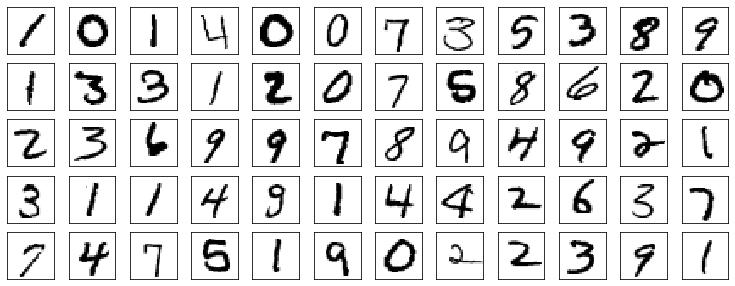

In [8]:
fig, axs = plt.subplots(5,12,figsize=(13,5))

for i in range(5):
    for j in range(12):
        axs[i,j].imshow(x[12*i+j,:,:,0]*(-1)+1,cmap='gray')
        axs[i,j].get_xaxis().set_visible(False)
        axs[i,j].get_yaxis().set_visible(False)

### Train, validation and test split

In [9]:
x_train, y_train = x[0:int(len(x)*0.8)], y[0:int(len(x)*0.8)]
x_val, y_val = x[int(len(x)*0.8):int(len(x)*0.9)], y[int(len(x)*0.8):int(len(x)*0.9)]
x_test, y_test = x[int(len(x)*0.9):len(x)], y[int(len(x)*0.9):len(x)]

In [10]:
print('Train samples: \t \t',x_train.shape[0],'\t 80 %')
print('Validation samples: \t ',x_val.shape[0],'\t 10 %')
print('Test samples: \t \t ' ,x_test.shape[0],'\t 10 %')

Train samples: 	 	 33600 	 80 %
Validation samples: 	  4200 	 10 %
Test samples: 	 	  4200 	 10 %


### Build MLP model

In [11]:
model_mlp = keras.Sequential()
model_mlp.add(keras.Input(shape=(28,28,1)))
model_mlp.add(layers.Flatten())
model_mlp.add(layers.Dense(200, activation='relu'))
model_mlp.add(layers.Dense(100, activation='relu'))
model_mlp.add(layers.Dense(10, activation="softmax"))
model_mlp.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 200)               157000    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 178,110
Trainable params: 178,110
Non-trainable params: 0
_________________________________________________________________


### Build CNN model

In [12]:
model_cnn = keras.Sequential()
model_cnn.add(keras.Input(shape=(28,28,1)))
model_cnn.add(layers.Conv2D(50, kernel_size=(3, 3), activation="relu"))
model_cnn.add(layers.MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(layers.Conv2D(100, kernel_size=(3, 3), activation="relu"))
model_cnn.add(layers.MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(layers.Flatten())
model_cnn.add(layers.Dense(10, activation="softmax"))
model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 50)        500       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 50)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 100)       45100     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 100)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2500)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                25010     
Total params: 70,610
Trainable params: 70,610
Non-trainable params: 0
__________________________________________________

### Train the models

In [13]:
model_mlp.compile(loss="categorical_crossentropy", optimizer="adam", 
                  metrics=["accuracy"])
model_cnn.compile(loss="categorical_crossentropy", optimizer="adam", 
                  metrics=["accuracy"])
print('\033[1;34m'+'Training MLP model \n')
history_mlp = model_mlp.fit(x_train, y_train, validation_data=(x_val, y_val), 
                            batch_size=200, epochs=25)
print('\n\n'+'\033[1;34m'+'Training CNN model \n')
history_cnn = model_cnn.fit(x_train, y_train, validation_data=(x_val, y_val), 
                            batch_size=200, epochs=25)

Training MLP model 

Epoch 1/25
168/168 [==============================] - 2s 8ms/step - loss: 0.4405 - accuracy: 0.8799 - val_loss: 0.2030 - val_accuracy: 0.9374
Epoch 2/25
168/168 [==============================] - 1s 6ms/step - loss: 0.1695 - accuracy: 0.9507 - val_loss: 0.1434 - val_accuracy: 0.9571
Epoch 3/25
168/168 [==============================] - 1s 6ms/step - loss: 0.1153 - accuracy: 0.9671 - val_loss: 0.1220 - val_accuracy: 0.9640
Epoch 4/25
168/168 [==============================] - 1s 6ms/step - loss: 0.0866 - accuracy: 0.9761 - val_loss: 0.0990 - val_accuracy: 0.9712
Epoch 5/25
168/168 [==============================] - 1s 6ms/step - loss: 0.0655 - accuracy: 0.9812 - val_loss: 0.0935 - val_accuracy: 0.9738
Epoch 6/25
168/168 [==============================] - 1s 6ms/step - loss: 0.0516 - accuracy: 0.9852 - val_loss: 0.1021 - val_accuracy: 0.9690
Epoch 7/25
168/168 [==============================] - 1s 6ms/step - loss: 0.0406 - accuracy: 0.9885 - val_loss: 0.0868 - val_ac

### Plot metrics

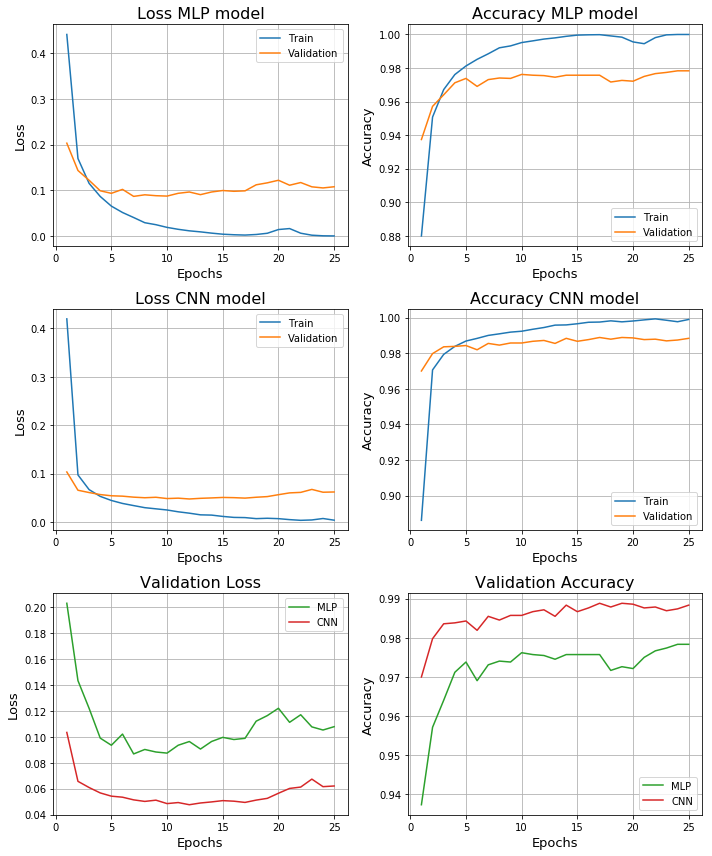

In [14]:
fig, axs = plt.subplots(3,2,figsize=(10,12))

ax_data = [[[history_mlp.history['loss'], history_mlp.history['val_loss']],
            [history_mlp.history['accuracy'], history_mlp.history['val_accuracy']]],
           [[history_cnn.history['loss'], history_cnn.history['val_loss']],
            [history_cnn.history['accuracy'], history_cnn.history['val_accuracy']]],
           [[history_mlp.history['val_loss'], history_cnn.history['val_loss']],
            [history_mlp.history['val_accuracy'], history_cnn.history['val_accuracy']]]]
labels = [[['Train','Validation'],['Train','Validation']],
          [['Train','Validation'],['Train','Validation']],
          [['MLP','CNN'],['MLP','CNN']]]
y_labels = ['Loss','Accuracy'] 
titles = [['Loss MLP model','Accuracy MLP model'],
          ['Loss CNN model','Accuracy CNN model'],
          ['Validation Loss','Validation Accuracy']]
colors = [[['C0','C1'],['C0','C1']],
          [['C0','C1'],['C0','C1']],
          [['C2','C3'],['C2','C3']]]

for i in range(3):
    for j in range(2):
        for k in range(2):
            axs[i,j].plot(np.arange(1,len(ax_data[i][j][k])+1),
                          ax_data[i][j][k],
                          label=labels[i][j][k],
                          color=colors[i][j][k])
        axs[i,j].set_title(titles[i][j],fontsize=16)
        axs[i,j].set_xlabel('Epochs',fontsize=13)
        axs[i,j].set_ylabel(y_labels[j],fontsize=13)
        axs[i,j].legend()
        axs[i,j].grid()
fig.tight_layout()
plt.show()           

### Evaluate models on test set

In [15]:
score_mlp = model_mlp.evaluate(x_test, y_test, verbose=0)
score_cnn = model_cnn.evaluate(x_test, y_test, verbose=0)

In [16]:
y_predict_mlp = model_mlp.predict(x_test)
y_predict_cnn = model_cnn.predict(x_test)

y_true_mlp = np.zeros((len(y_test),),dtype=int)
y_pred_mlp = np.zeros((len(y_test),),dtype=int)
y_true_cnn = np.zeros((len(y_test),),dtype=int)
y_pred_cnn = np.zeros((len(y_test),),dtype=int)

for i in range(len(y_test)):
    y_true_mlp[i] = np.where(y_test[i] == np.amax(y_test[i]))[0][0]
    y_pred_mlp[i] = np.where(y_predict_mlp[i] == np.amax(y_predict_mlp[i]))[0][0]
    y_true_cnn[i] = np.where(y_test[i] == np.amax(y_test[i]))[0][0]
    y_pred_cnn[i] = np.where(y_predict_cnn[i] == np.amax(y_predict_cnn[i]))[0][0]     

In [17]:
print('\033[1;34m'+'\nScore \n')
print('\033[0;30m'+tabulate([['MLP',score_mlp[0],score_mlp[1]],
                ['CNN',score_cnn[0],score_cnn[1]]], 
               headers=["Model:", "Test loss:", 
                        "Test accuracy:"])+'\n\n')
print('\033[1;34m'+'Classification report for MLP model \n')
print('\033[0;30m'+classification_report(y_true_mlp,
                            y_pred_mlp,
                            target_names=['0','1','2','3','4','5','6','7','8','9'])+'\n')
print('\033[1;34m'+'Classification report for CNN model \n')
print('\033[0;30m'+classification_report(y_true_cnn,
                            y_pred_cnn,
                            target_names=['0','1','2','3','4','5','6','7','8','9'])+'\n')


Score 

Model:      Test loss:    Test accuracy:
--------  ------------  ----------------
MLP          0.112672           0.976667
CNN          0.0498423          0.988333


Classification report for MLP model 

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       455
           1       0.98      0.99      0.98       458
           2       0.98      0.96      0.97       392
           3       0.98      0.96      0.97       448
           4       0.97      0.99      0.98       438
           5       0.98      0.95      0.97       354
           6       0.99      0.99      0.99       413
           7       0.98      0.98      0.98       421
           8       0.95      0.97      0.96       397
           9       0.98      0.97      0.98       424

   micro avg       0.98      0.98      0.98      4200
   macro avg       0.98      0.98      0.98      4200
weighted avg       0.98      0.98      0.98      4200


Classification report for C

### Confusion Matrix

In [18]:
cm_mlp = confusion_matrix(y_true_mlp, y_pred_mlp)
cm_cnn = confusion_matrix(y_true_cnn, y_pred_cnn)

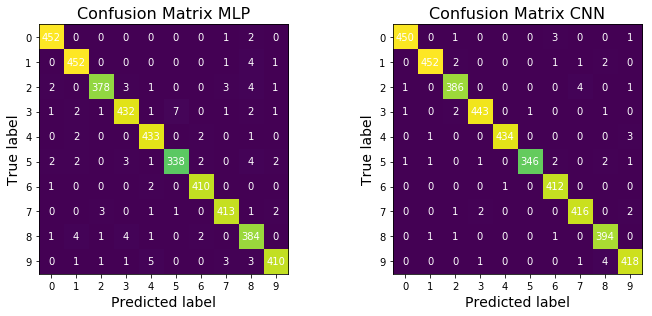

In [19]:
fig, axs = plt.subplots(1,2,figsize=(10,4.5))
axs[0].imshow(cm_mlp)
axs[1].imshow(cm_cnn)
for i in range(2):
    axs[i].set_xticks(np.arange(10))
    axs[i].set_yticks(np.arange(10))
    axs[i].set_xlabel('Predicted label',fontsize=14)
    axs[i].set_ylabel('True label',fontsize=14)

for i in range(10):
    for j in range(10):
        axs[0].text(j, i, cm_mlp[i, j],
                    ha="center", va="center", color="w")
        axs[1].text(j, i, cm_cnn[i, j],
                    ha="center", va="center", color="w")

axs[0].set_title("Confusion Matrix MLP",fontsize=16)
axs[1].set_title("Confusion Matrix CNN",fontsize=16)
fig.tight_layout()
plt.show()

### Visualize predictions on test data

MLP predictions 



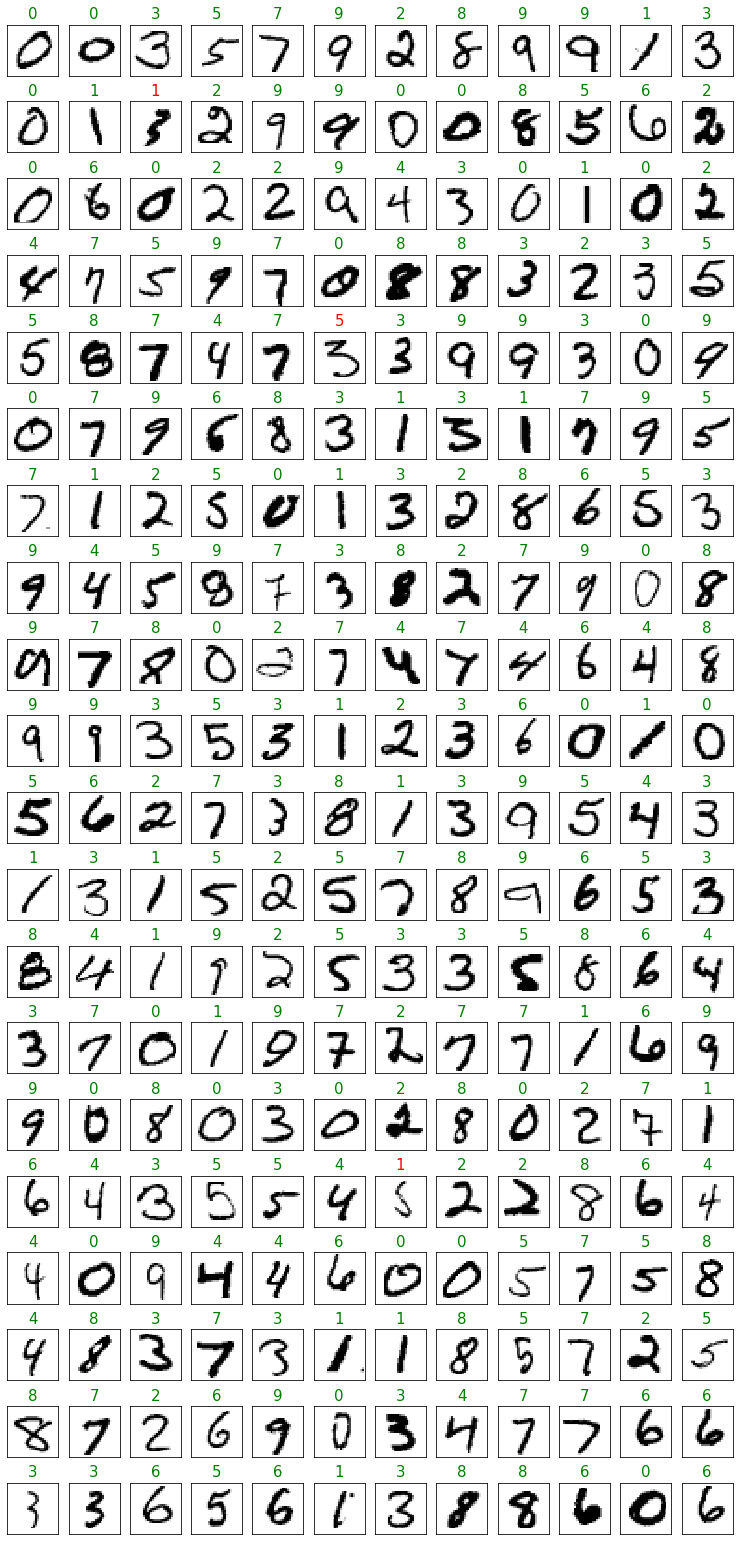

In [20]:
print('\033[1;34m'+'MLP predictions \n')
fig, axs = plt.subplots(20,12,figsize=(13,28))
for i in range(20):
    for j in range(12):
        axs[i,j].imshow(x_test[12*i+j,:,:,0]*(-1)+1,cmap='gray')
        axs[i,j].get_xaxis().set_visible(False)
        axs[i,j].get_yaxis().set_visible(False)
        axs[i,j].set_title(y_pred_mlp[12*i+j],
                           color='green' if y_pred_mlp[12*i+j] ==
                           y_true_mlp[12*i+j] else 'red',
                           fontsize=15)

CNN predictions 



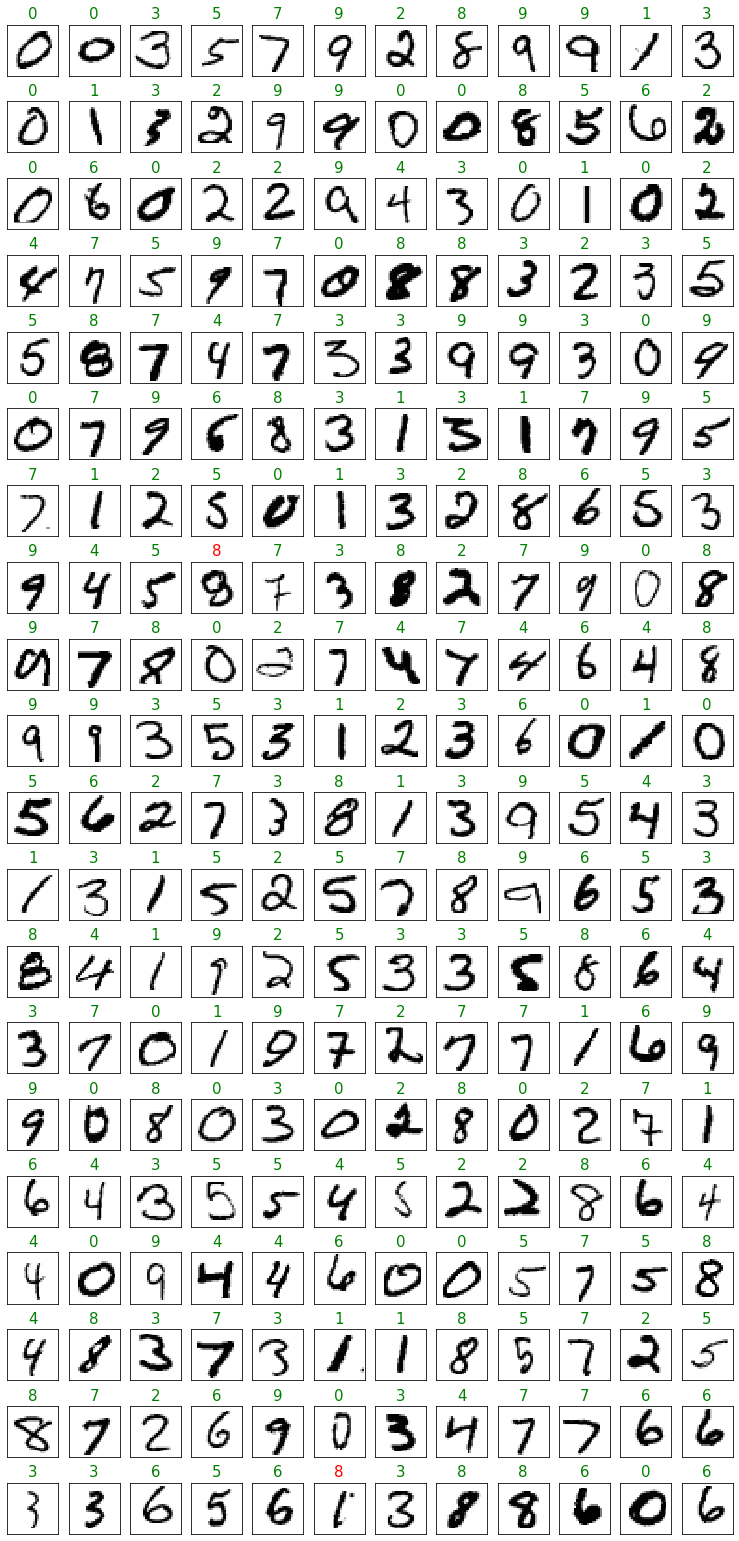

In [21]:
print('\033[1;34m'+'CNN predictions \n')
fig, axs = plt.subplots(20,12,figsize=(13,28))
for i in range(20):
    for j in range(12):
        axs[i,j].imshow(x_test[12*i+j,:,:,0]*(-1)+1,cmap='gray')
        axs[i,j].get_xaxis().set_visible(False)
        axs[i,j].get_yaxis().set_visible(False)
        axs[i,j].set_title(y_pred_cnn[12*i+j],
                           color='green' if y_pred_cnn[12*i+j] ==
                           y_true_cnn[12*i+j] else 'red',
                           fontsize=15)

### Save models

In [22]:
if not os.path.exists('./models'):
    os.makedirs('./models')
model_mlp.save('./models/model_mlp.h5')
model_cnn.save('./models/model_cnn.h5')

### Predictions on a new test data set

In [23]:
test = pd.read_csv('./data/test.csv')

In [24]:
test.shape

(28000, 784)

In [25]:
test = test.iloc[:,:].to_numpy().reshape(test.shape[0],28,28)/256
test = np.expand_dims(test, -1)
test.shape

(28000, 28, 28, 1)

In [26]:
predict = model_cnn.predict(test)

### Save predictions

In [27]:
samples = np.zeros((predict.shape[0],2),dtype=int)

for i in range(predict.shape[0]):
    samples[i][0] = i+1
    samples[i][1] = np.where(predict[i] == np.amax(predict[i]))[0][0]

In [28]:
samples_ = pd.DataFrame(samples,columns=['ImageId','Label'])
samples_

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [29]:
if not os.path.exists('./predictions'):
    os.makedirs('./predictions')
samples_.to_csv('./predictions/samples.csv',index=False)

### Visualize some predictions of the CNN model on the new data set

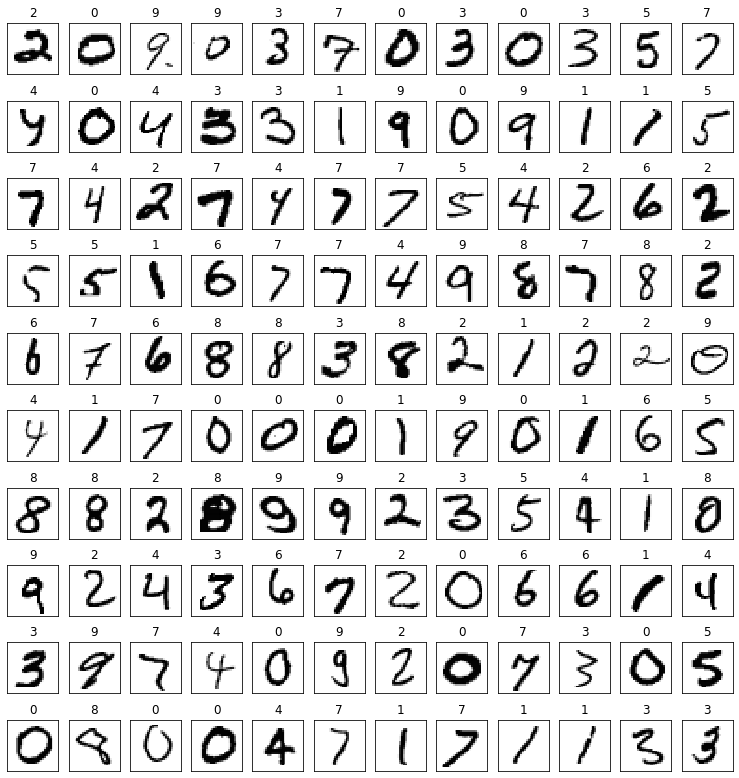

In [30]:
fig, axs = plt.subplots(10,12,figsize=(13,14))

for i in range(10):
    for j in range(12):
        axs[i,j].imshow(test[12*i+j,:,:,0]*(-1)+1,cmap='gray')
        axs[i,j].get_xaxis().set_visible(False)
        axs[i,j].get_yaxis().set_visible(False)
        axs[i,j].set_title(samples[12*i+j,1])